# **Création d'un premier neurone à la main** - *Inspiré de la formation de Machine Learnia*

# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

Voici notre dataset :

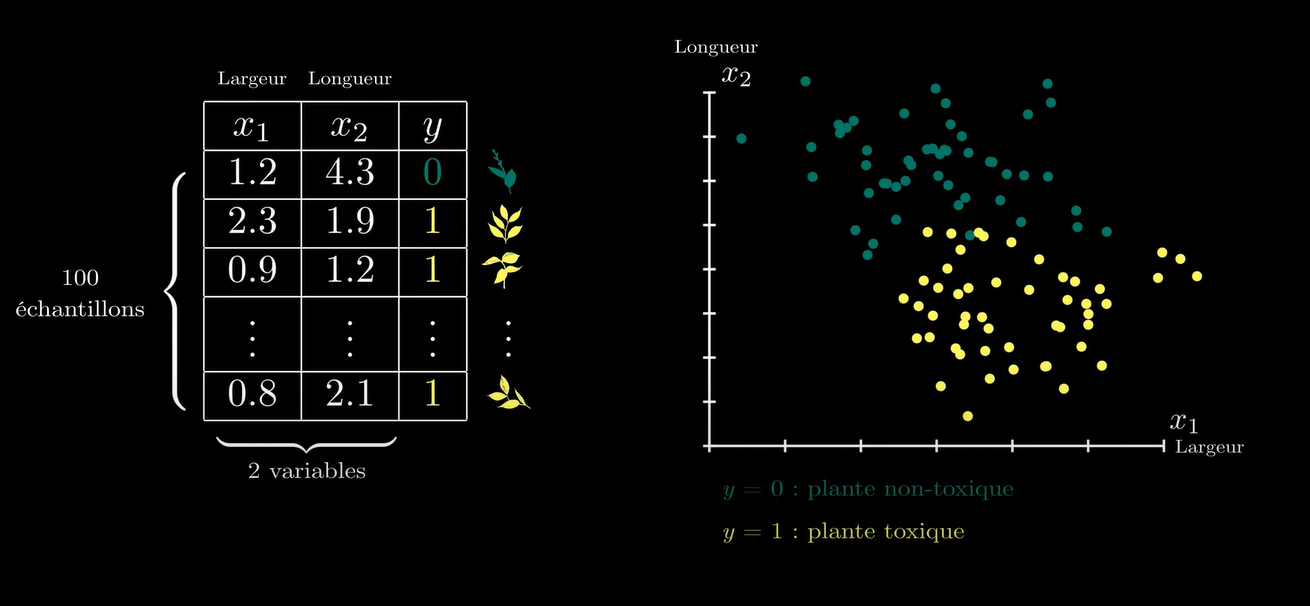

Voici les dimensions de notre vecteur X :

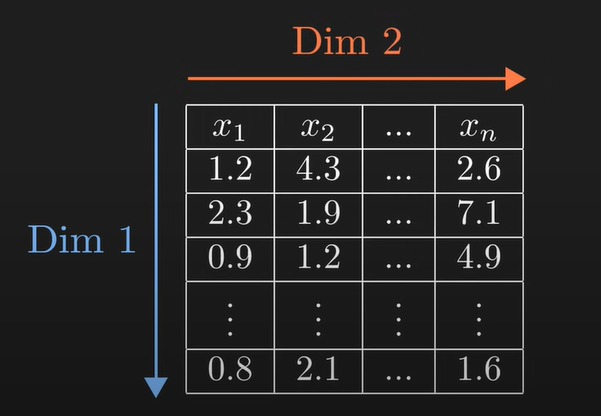

Créons et représentons notre dataset graphiquement ainsi que les dimensions de nos vecteurs X et y :

dimensions de X: (100, 2)
dimensions de y: (100, 1)


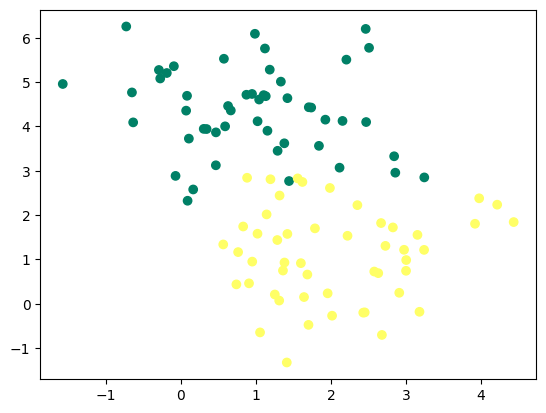

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modèle

Voici l'ensemble des fonctions que nous devons définir pour créer notre 1er neurone à la main :

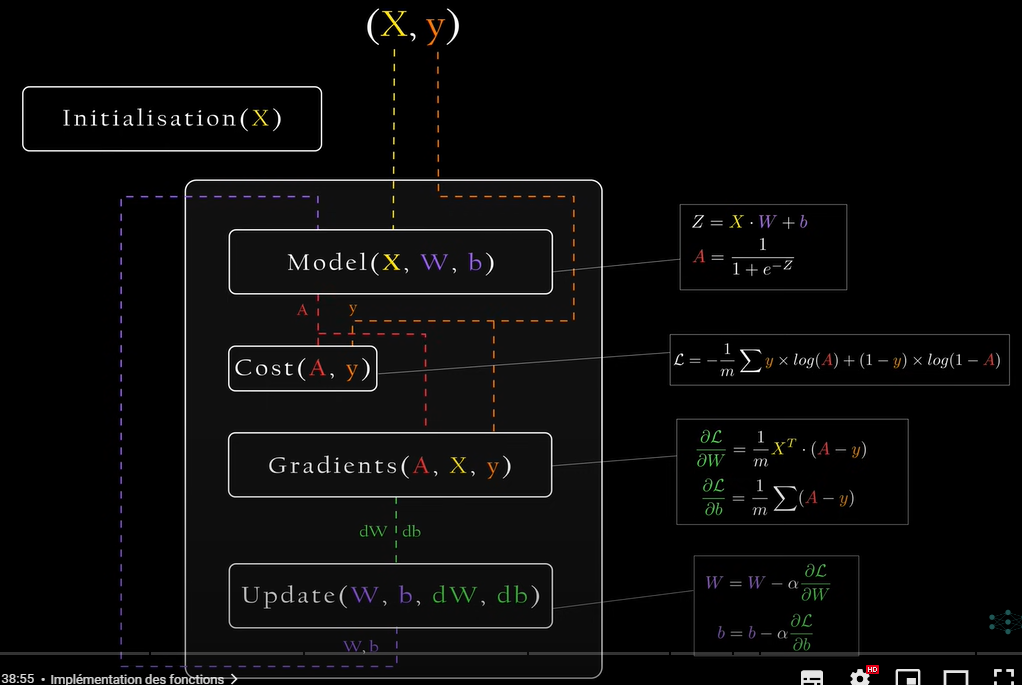

Voici les représentations et dimensions de nos vecteurs X et W :

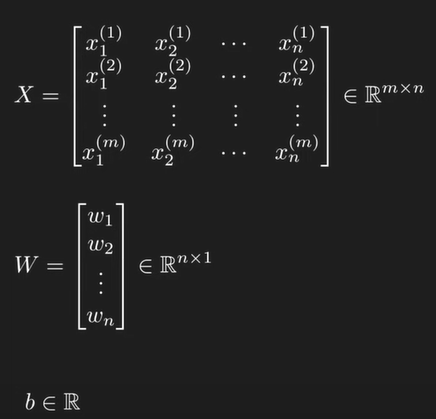

Initialisons W et b selon les dimensions ci-dessus :

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

Voici les équations respectives de notre frontière de décision (Z = X . W + b) et notre fonction d'activation (nous utilisons ici la fonction sigmoïde, autrement appelé "fonction logistique" tel que 1 = 1/(1+exp(-Z) )

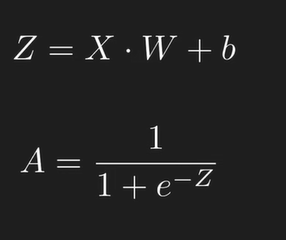

En analysant les dimensions des vecteurs X et W, on en déduit que le produit matriciel X . W sera de dimension : (m,1)

Pour rappel, voici les propriétés du produit matriciel :

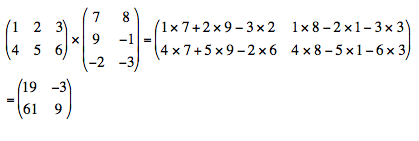

Créons notre fonction modèle qui définit les équations vues ci-dessus et nous retourne l'activation :

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

Voici l'équation de notre fonction coût (également appelé Log Loss) :

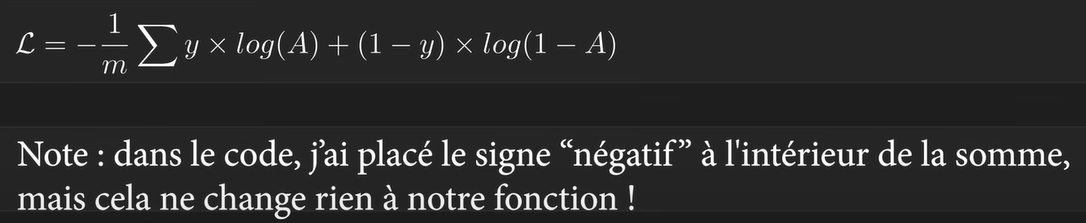

En réalité, on cherche à maximiser notre fonction de vraisemblance. Mais trouver un maximum d'une fonction n'est pas simple.

Or maximiser f(x) = minimiser -f(x)

Le facteur "-1" illustre qu'on cherche à minimiser notre fonction coût.

Le "1/m" correspond à une normalisation, où m est le nombre d'échantillons de notre dataset.

Définissons notre fonction coût :

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

Voici les gradients de notre fonction coût, qui correspondent aux dérivés partielles de notre fonction coût par aux paramètres de notre modèle (les vecteurs W et b) :

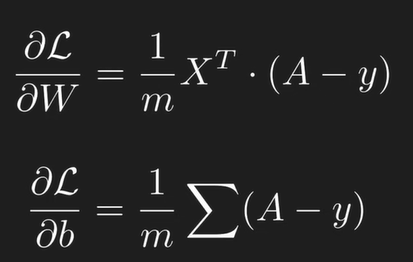

Définissons notre fonction gradients :

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

Voici les équations de mise à jour de nos poids et biais lors de la descente de gradients :

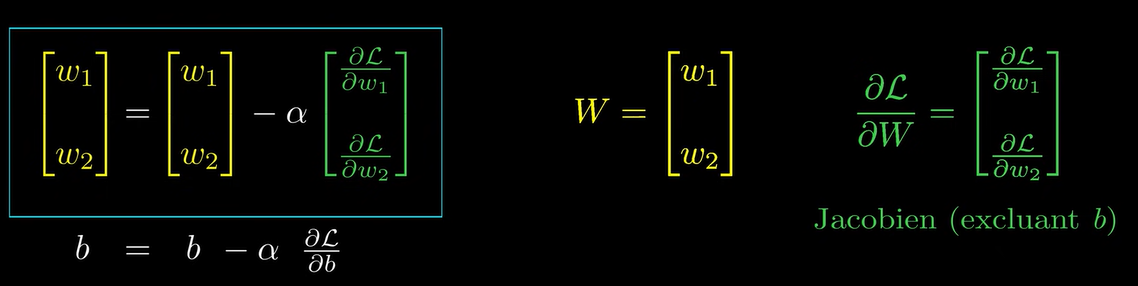

En utilisant nos vecteurs W et b comme utilisés habituellement :

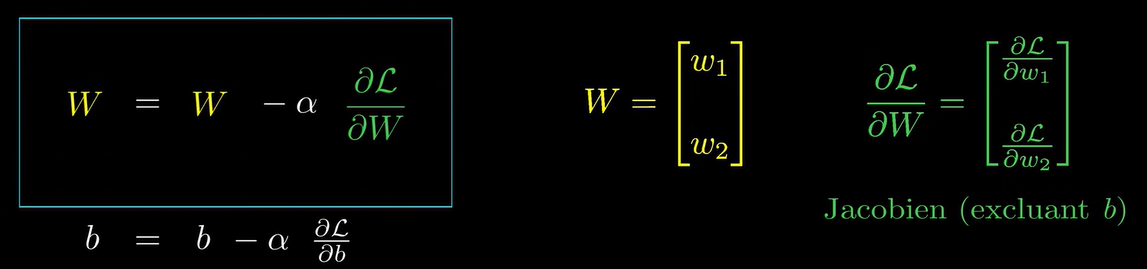

Voici les équations à retenir pour la correction de nos poids et biais pour minimiser la fonction coût :

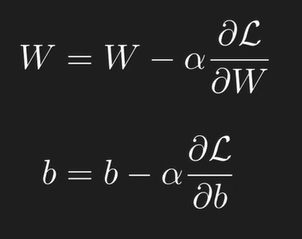

Définissons notre fonction de mise à jour des poids et biais lors de la descente de gradients :

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

Voici les propriétés de notre fonction d'activation, la fonction sigmoïde (logistique) :

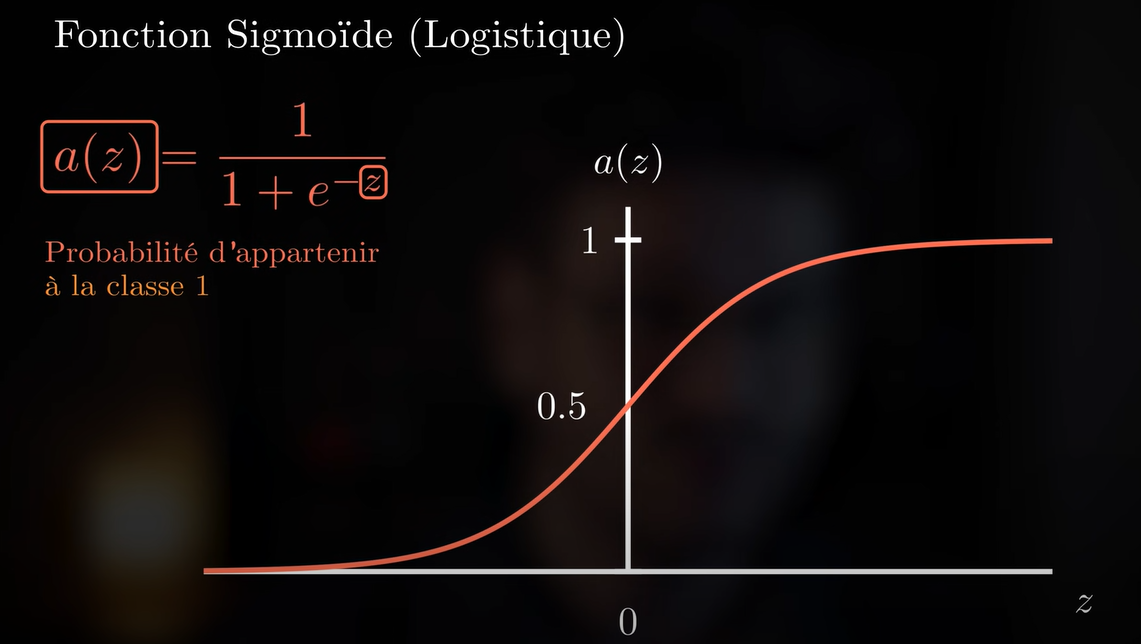

Elle nous renvoie la probabilité d'appartenance à la classe 1, comprise entre 0 et 1

Ainsi si A<0.5 : le modèle prédit y=0 ; si A>0.5 : le modèle prédit y=1

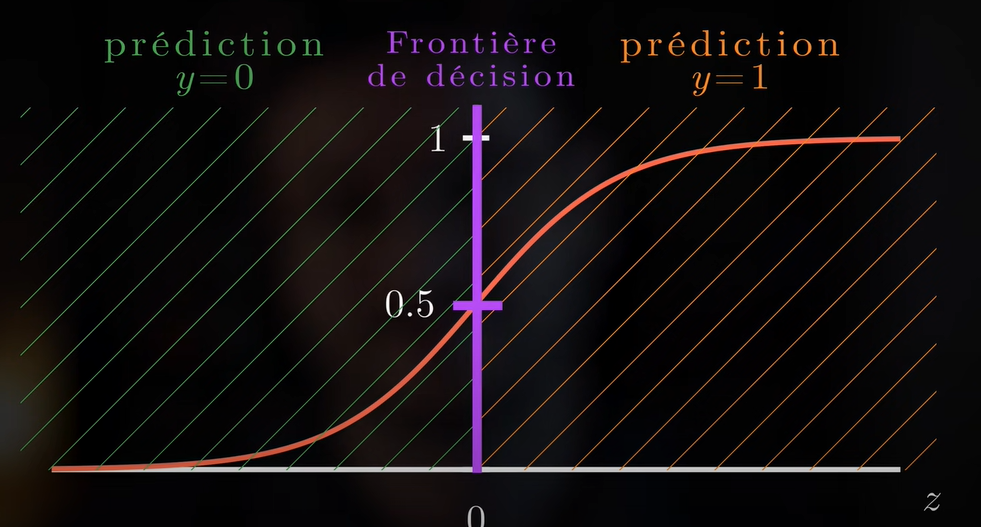

Définissons la fonction prediction qui illustre ces prédictions de la fonction d'activation :

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

Importons la fonctionnalité d'accuracy (autrement appelé "précision"), différent de notre fonction coût :

In [9]:
from sklearn.metrics import accuracy_score

On peut donc créer notre premier neurone artificiel à la main, en exploitant toutes les fonctions ci-dessous :

In [10]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print("Accuracy : ", accuracy_score(y, y_pred))

    plt.plot(Loss, label='Loss')
    plt.legend()
    plt.show()

    return (W, b)


Testons notre neurone sur notre dataset :

Accuracy :  0.9


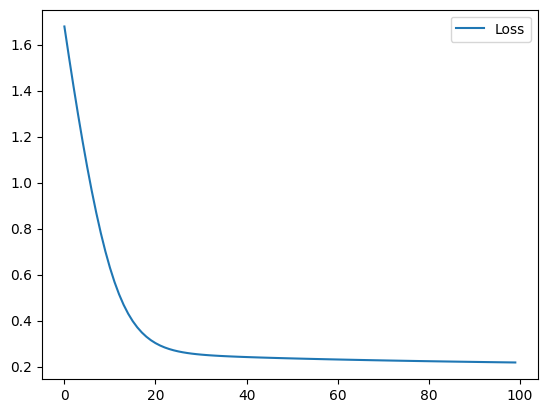

In [11]:
W, b = artificial_neuron(X, y)

# 3. Frontière de décision

Voici les propriétés de la frontière de décision :

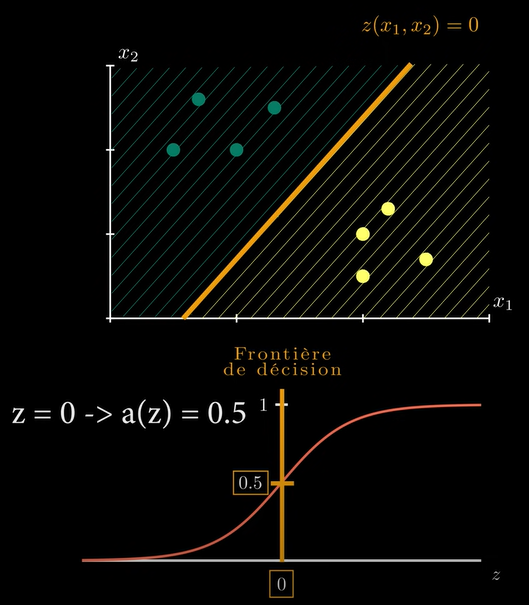

On en déduit l'équation de la frontière de décision pour la tracer sur le graphe de notre dataset :

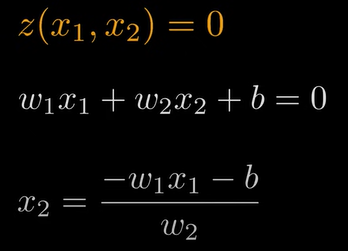

Traçons la frontière de décision sur le graphe de notre dataset :

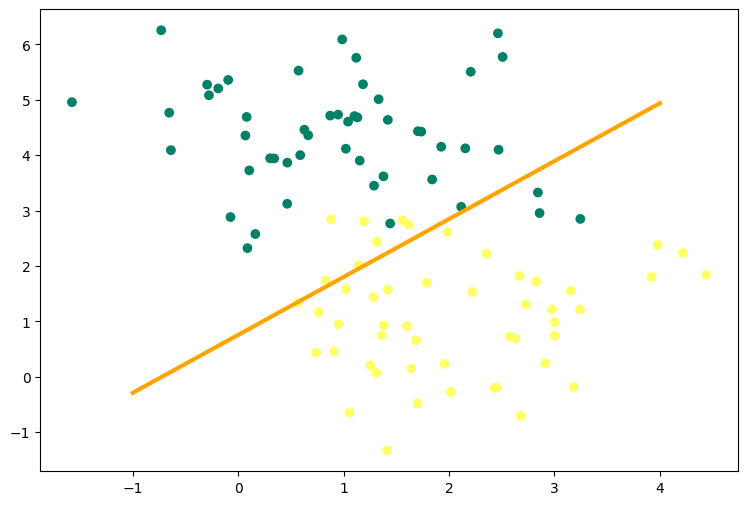

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# 4. Visualisations 3D

Il est également possible de visualiser en 3D notre dataset et également la courbe de notre fonction d'activation (fonction sigmoïde ou fonction logistique) sur notre dataset :

In [13]:
import plotly.graph_objects as go

In [14]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [15]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()
